In [ ]:
#### In This project we are going to deal with Machine Learning Implementation using Decision Trees Algorithm
### We have taken a sample dataset as Kyphosis.csv which tells us if the kyphosis disease will be present
#### or absent in children after the operation based on the parameteres like Age , Number and Start
### the description of each of these columns is provided below 
### Let's go ahead and see how can we implement this algrorithm and try to plot the visualization chart as well

In [1]:
### Making necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
#### fetching the test file into the dataset
dataset=pd.read_csv("kyphosis.csv")

In [8]:
##### the below dataset deals with the scenario if the kyphosis disease is present in children or not after the operation
### since we are talking about children here , we deduce that age column is in months
### number column represents the number of vertebrates involved in the operation
### start represents the topmost vertebrate number which has been operated
### so if the start is 5 , it means that 5th vertebrate from top was involved in the operation
##3 then we have our target class kyphosis which shows if the disease is present or absent
dataset.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
###using describe menthod to check the descriptive statistics for the features
dataset.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [5]:
#### using the info method to find more about the columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


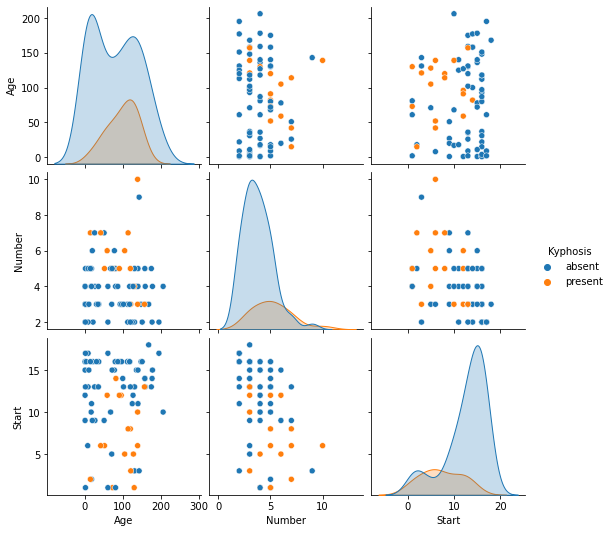

In [10]:
###let's go ahead and try to find more about the data using data visualization(seaborn library)
sns.pairplot(dataset,hue='Kyphosis')

In [ ]:
#### from above graph , we can find out the relationship between different features
### the above pair plot helps us to depict the distribution between all the features

In [ ]:
###starting the implementation of Decision trees algorithm

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
##selecting the features and target classes
X=dataset.drop(['Kyphosis'],axis=1)
y=dataset['Kyphosis']

In [15]:
###performing the random split and keeping test size as 30%
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=234,test_size=0.30)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
####instantiating decision tree classifier
model=DecisionTreeClassifier()

In [18]:
##### training the model
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
###making the predictions
predictions=model.predict(X_test)

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [21]:
###printing out the confusion matrix and the necessary metrics
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[20  1]
 [ 3  1]]
              precision    recall  f1-score   support

      absent       0.87      0.95      0.91        21
     present       0.50      0.25      0.33         4

    accuracy                           0.84        25
   macro avg       0.68      0.60      0.62        25
weighted avg       0.81      0.84      0.82        25



In [ ]:
#As per the above metrics we see that we are not able to identify only 4 test cases out of 25
## but accuracy should not be considered as a reliable metric source as we have an unbalanced dataset
## we see that we got approx 81% of precision. Precision refers to the quality of positive prediction made by model
### basically what is says that out of all positive predictions made by the model 81% were true positives
##we see that we have 84% of recall.
## we get the f1. score as 0.82. Closer to 1 better the model. 0.82 is not bad especially we have a small dataset.

In [28]:
from sklearn import tree

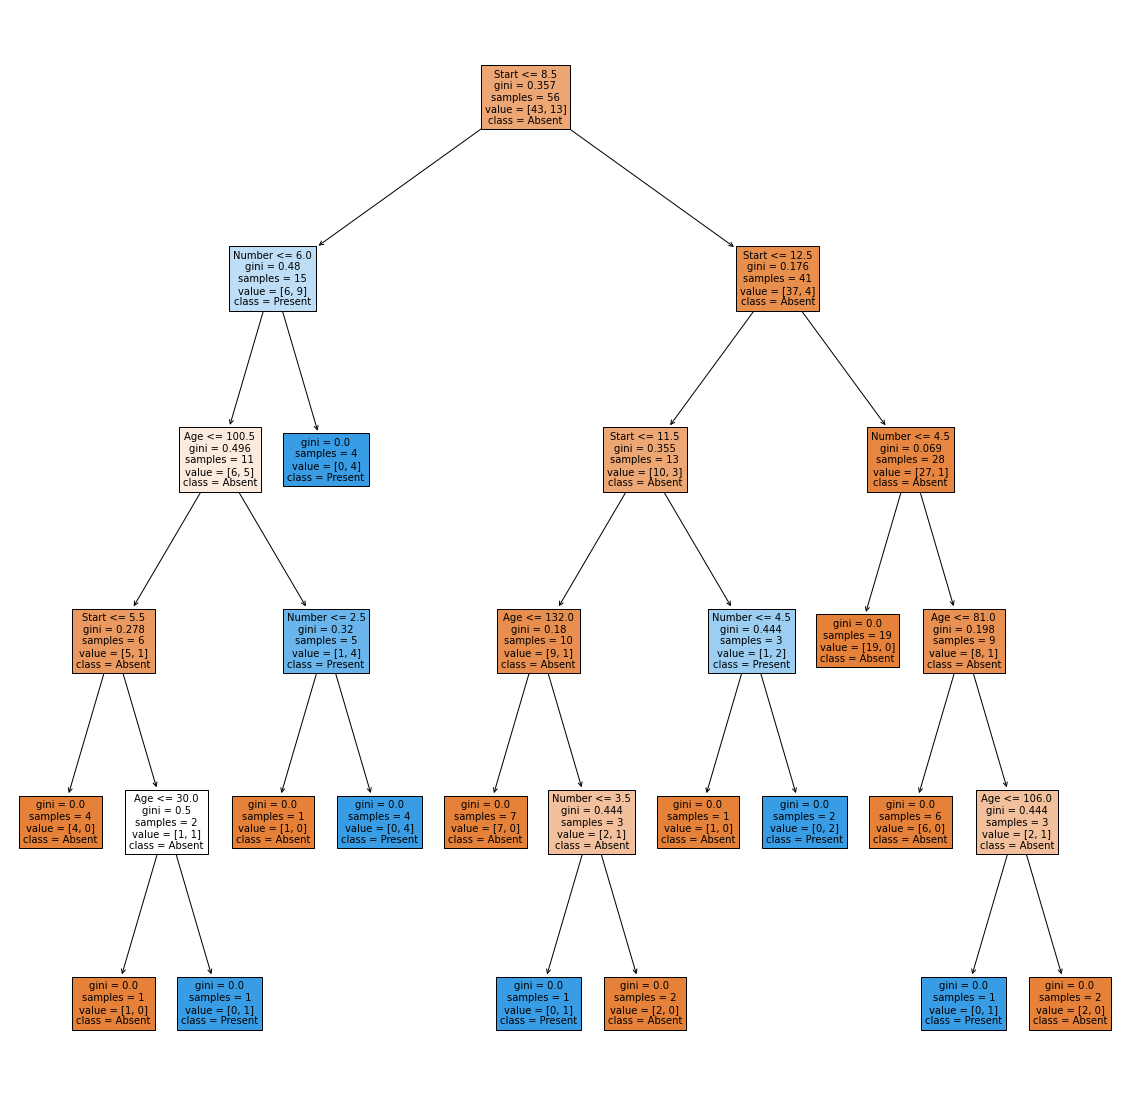

In [32]:
plt.figure(figsize=(20,20))
_=tree.plot_tree(model,feature_names=X_train.columns,class_names=['Absent','Present'],fontsize=10,filled=True)
plt.show()

In [ ]:
#### the above decision tree shows the visualization of the model
### on the basis of the entropy and information gain , root nodes and leaf nodes are chosen